In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sqlite3

In [3]:
con = sqlite3.connect(r"password_data.sqlite")

In [4]:
data = pd.read_sql_query("SELECT * FROM Users", con)

In [5]:
data.shape

(100000, 3)

In [6]:
data.head(4)

index                 password  strength
0      0                zxe870819         1
1      1             xw46454nr23l         1
2      2                soporte13         1
3      3  accounts6000webhost.com         2

In [7]:
data.columns

Index(['index', 'password', 'strength'], dtype='object')

## Data Cleaning

### Checking Irrevelant Columns 

In [8]:
data.drop(["index"], axis=1, inplace= True)

In [9]:
data.head()

password  strength
0                zxe870819         1
1             xw46454nr23l         1
2                soporte13         1
3  accounts6000webhost.com         2
4                 c443balg         1

### Checking Duplicate Values

In [10]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [11]:
data.duplicated().sum()

0

### Checking Missing Values

In [12]:
data.isnull()

password  strength
0         False     False
1         False     False
2         False     False
3         False     False
4         False     False
...         ...       ...
99995     False     False
99996     False     False
99997     False     False
99998     False     False
99999     False     False

[100000 rows x 2 columns]

In [13]:
data.isnull().any()

password    False
strength    False
dtype: bool

In [14]:
data.isnull().any().sum()

0

### Checking Irrevelant Rows

In [15]:
data["strength"]

0        1
1        1
2        1
3        2
4        1
        ..
99995    1
99996    1
99997    1
99998    1
99999    1
Name: strength, Length: 100000, dtype: int64

In [16]:
data["strength"].unique()

array([1, 2, 0])

### Semantic Analysis

In [17]:
type(data["password"][0])

str

In [18]:
data["password"].str.isnumeric()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [19]:
data[data["password"].str.isnumeric()]

password  strength
12280   943801         0
14992    12345         0
20958   147856         0
21671   140290         0
23269   123987         0
28569  1233214         0
31329  0159456         0
32574   363761         0
37855  4524344         0
43648  5521597         0
45271   626262         0
52266   156651         0
58717      369         0
59619   151106         0
67723     1234         0
68106  1995151         0
68592   112233         0
69255  9562489         0
74938       12         0
77298    18731         0
86406     1050         0
86608   158491         0
94908   060415         0
96459        1         0
98122  6975818         0
98248   454545         0

In [20]:
data[data["password"].str.isnumeric()].shape

(26, 2)

In [21]:
data[data["password"].str.isupper()]

password  strength
115       EYT63119         1
273      INSPIRON6         1
338       1A2S3D4F         1
367      13269123A         1
373     YAMAZAKI82         1
...            ...       ...
99590   V13000993J         1
99692  65925013ABC         1
99784     01EDD055         1
99893     1UPONYOU         1
99910       UNION1         0

[1506 rows x 2 columns]

In [22]:
data[data["password"].str.isalpha()]

password  strength
267    PomarancaÇ         1
1380       smgodt         0
3198        cuado         0
4560        jelsz         0
6380       demsxp         0
7803       secret         0
9218      caballo         0
11555         mhe         0
11667      kreedo         0
13645     nõmlich         0
14665     tahiana         0
14890      bolaos         0
16741      sherry         0
18066      llÚÚßß         0
19500       maraa         0
25572       akido         0
26472       abcde         0
28238       HAMED         0
29116      cacinG         0
31029      indißn         0
32283      niatkm         0
36935     sarokkd         0
46289     zxcvbnm         0
48091      taison         0
48204     jasacom         0
48943      elseor         0
49608      elango         0
51434     lestari         0
52874     anhyeem         0
56272      briceo         0
61580       askim         0
61993      dßniel         0
63031      kimota         0
67165      trcske         0
67593      BRTTAM         0
69501       cuada         0
73125     hepkret         0
74049       anann         0
74553     kobraak         0
75073     glemlak         0
75294     jgkocka         0
76977     Dungeon         0
78199     nikuÜka         0
80307      castao         0
82638     winseen         0
84115       sayap         0
85423       adgjl         0
89287     nyomork         0
92715     regipek         0
92992       grkan         0

In [23]:
data[data["password"].str.isalpha()].shape

(50, 2)

In [24]:
data[data["password"].str.isalnum()]

password  strength
0         zxe870819         1
1      xw46454nr23l         1
2         soporte13         1
4          c443balg         1
5         16623670p         1
...             ...       ...
99995    obejofi215         1
99996    fmiopvxb64         1
99997     czvrbun38         1
99998     mymyxe430         1
99999   glqjhkxb467         1

[97203 rows x 2 columns]

In [25]:
data[data["password"].str.isalnum()].shape

(97203, 2)

In [26]:
data[data["password"].str.istitle()]

password  strength
64       Hisanthoshjasika0         2
242    Therockrockbottom72         2
338               1A2S3D4F         1
367              13269123A         1
526        Csicskarozsika1         2
...                    ...       ...
99168          1053815198M         1
99192      Alfranx05122023         2
99375       Kensington1956         2
99590           V13000993J         1
99654       94010Centuripe         2

[932 rows x 2 columns]

### Finding rows with special character

In [27]:
import string

In [28]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
def find_special(row):
    for char in row:
        if char in string.punctuation:
            return 1
        else:
            pass

In [30]:
data["password"].apply(find_special)

0        NaN
1        NaN
2        NaN
3        1.0
4        NaN
        ... 
99995    NaN
99996    NaN
99997    NaN
99998    NaN
99999    NaN
Name: password, Length: 100000, dtype: float64

In [31]:
data["password"].apply(find_special)==1

0        False
1        False
2        False
3         True
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Name: password, Length: 100000, dtype: bool

In [32]:
data[data["password"].apply(find_special)==1]

password  strength
3      accounts6000webhost.com         2
68                12463773800+         1
98                  p.r.c.d.g.         1
145                  cita-cita         1
180         karolina.susnina0U         2
...                        ...       ...
99748             maiselis.com         1
99845          hosting4meze!@#         2
99954         semista_bakung15         2
99980         halflife2010!LEB         2
99988                lbhtrnjh@         1

[2663 rows x 2 columns]

### Feature Engineering

In [33]:
data["length"]=data["password"].str.len()

In [34]:
data.head()

password  strength  length
0                zxe870819         1       9
1             xw46454nr23l         1      12
2                soporte13         1       9
3  accounts6000webhost.com         2      23
4                 c443balg         1       8

In [37]:
password = "Amol1234"

In [38]:
[char for char in password if char.islower()]

['m', 'o', 'l']

In [39]:
len([char for char in password if char.islower()])

3

In [40]:
len([char for char in password if char.islower()])/len(password)

0.375

In [41]:
def freq_lowerCase(row):
    return len([char for char in row if char.islower()])/len(row)

In [42]:
def freq_upperCase(row):
    return len([char for char in row if char.isupper()])/len(row)

In [43]:
def freq_numCase(row):
    return len([char for char in row if char.isdigit()])/len(row)

In [44]:
data["password"].apply(freq_lowerCase)

0        0.333333
1        0.416667
2        0.777778
3        0.782609
4        0.625000
           ...   
99995    0.700000
99996    0.800000
99997    0.777778
99998    0.666667
99999    0.727273
Name: password, Length: 100000, dtype: float64

In [45]:
data["password"].apply(freq_upperCase)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99995    0.0
99996    0.0
99997    0.0
99998    0.0
99999    0.0
Name: password, Length: 100000, dtype: float64

In [46]:
data["password"].apply(freq_numCase)

0        0.666667
1        0.583333
2        0.222222
3        0.173913
4        0.375000
           ...   
99995    0.300000
99996    0.200000
99997    0.222222
99998    0.333333
99999    0.272727
Name: password, Length: 100000, dtype: float64

In [47]:
data.head()

password  strength  length
0                zxe870819         1       9
1             xw46454nr23l         1      12
2                soporte13         1       9
3  accounts6000webhost.com         2      23
4                 c443balg         1       8

In [48]:
data["lowercase_freq"] = np.round(data["password"].apply(freq_lowerCase),3)
data["uppercase_freq"] = np.round(data["password"].apply(freq_upperCase),3)
data["digit_freq"] = np.round(data["password"].apply(freq_numCase),3)

In [49]:
data.head()

password  strength  length  lowercase_freq  uppercase_freq  \
0                zxe870819         1       9           0.333             0.0   
1             xw46454nr23l         1      12           0.417             0.0   
2                soporte13         1       9           0.778             0.0   
3  accounts6000webhost.com         2      23           0.783             0.0   
4                 c443balg         1       8           0.625             0.0   

   digit_freq  
0       0.667  
1       0.583  
2       0.222  
3       0.174  
4       0.375

In [50]:
def freq_specialCase(row):
    specialChar = []
    for char in row:
        
        if not char.isalpha() and not char.isdigit():
            specialChar.append(char)
    return len(specialChar)/len(row)

In [51]:
data["special_char_freq"] = np.round(data["password"].apply(freq_specialCase), 3)

In [52]:
data.head()

password  strength  length  lowercase_freq  uppercase_freq  \
0                zxe870819         1       9           0.333             0.0   
1             xw46454nr23l         1      12           0.417             0.0   
2                soporte13         1       9           0.778             0.0   
3  accounts6000webhost.com         2      23           0.783             0.0   
4                 c443balg         1       8           0.625             0.0   

   digit_freq  special_char_freq  
0       0.667              0.000  
1       0.583              0.000  
2       0.222              0.000  
3       0.174              0.043  
4       0.375              0.000

### Data Analysis

In [53]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [54]:
data[["length","strength"]]

length  strength
0           9         1
1          12         1
2           9         1
3          23         2
4           8         1
...       ...       ...
99995      10         1
99996      10         1
99997       9         1
99998       9         1
99999      11         1

[100000 rows x 2 columns]

In [55]:
data[["length","strength"]].groupby(["strength"]).agg(["min","max","mean","median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

### Feature Importance

In [56]:
cols = ['length', 'lowercase_freq', 'uppercase_freq','digit_freq', 'special_char_freq']
for col in cols:
    print(col)
    print(data[[col,"strength"]].groupby(["strength"]).agg(["min","max","mean","median"]))
    print('\n')

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0


lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.708050  0.714
1                   0.0  0.923  0.630067  0.667
2                   0.0  0.917  0.424679  0.400


uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429


digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0   

In [57]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

<Axes: xlabel='strength', ylabel='special_char_freq'>

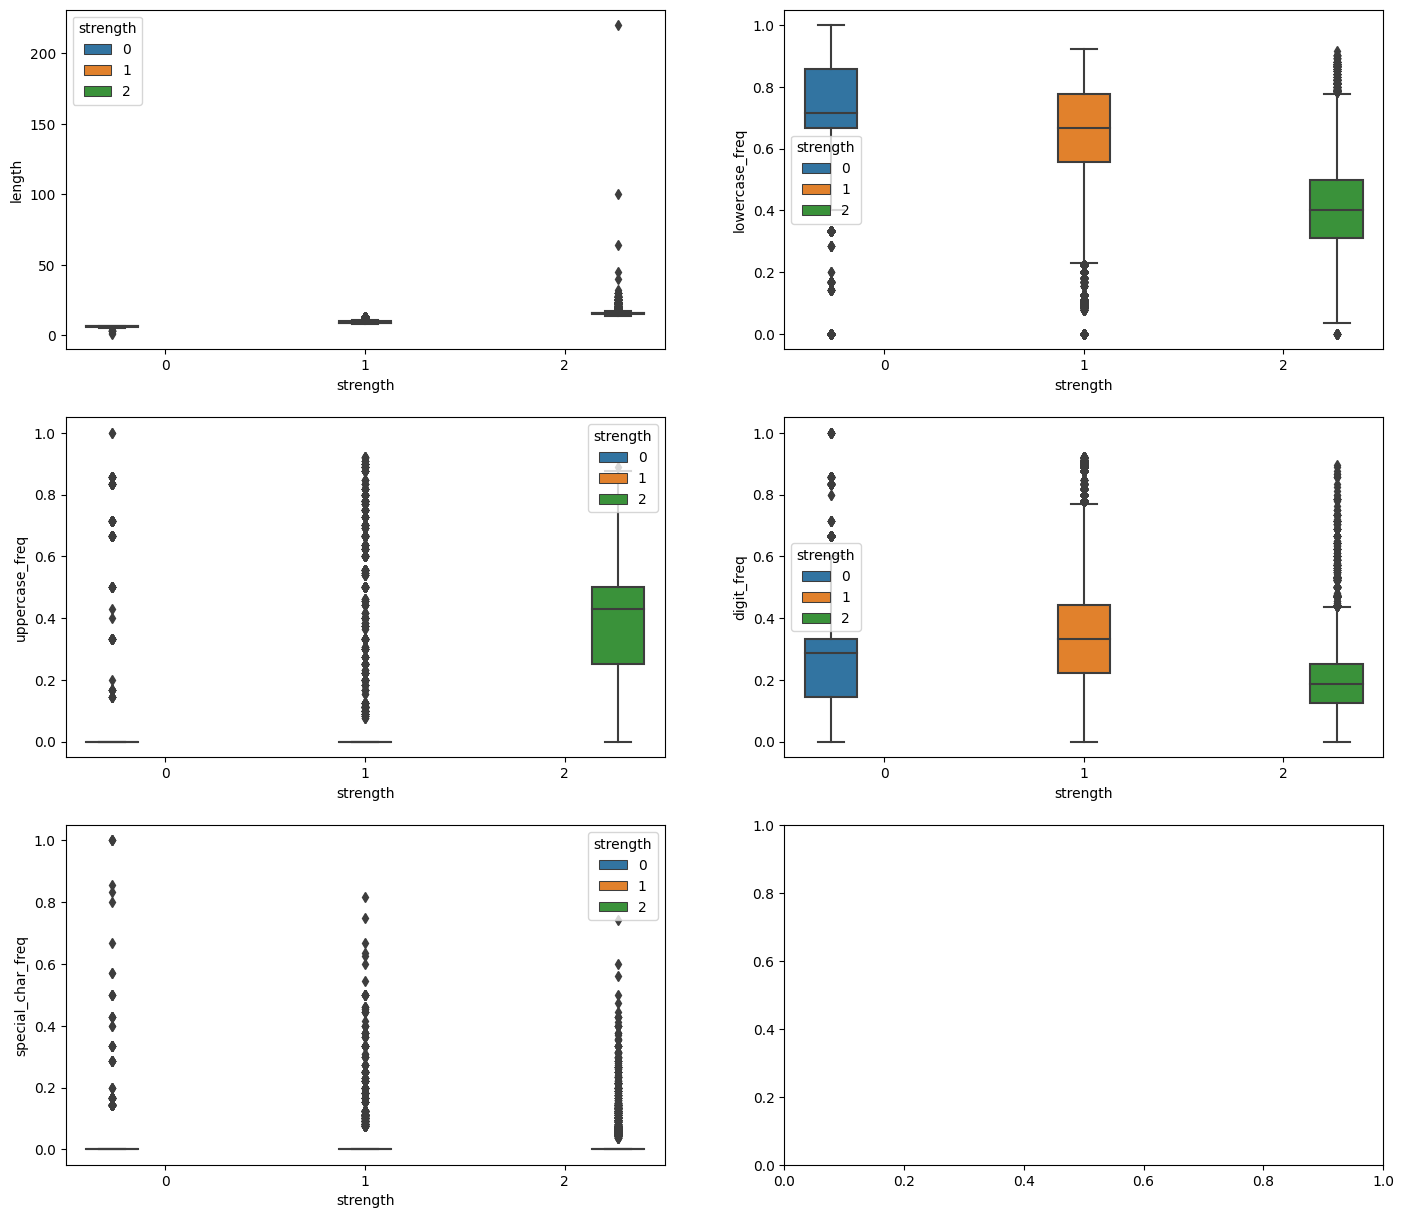

In [58]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6))= plt.subplots(3,2, figsize=(17,15))
sns.boxplot(x="strength", y="length", hue="strength", ax=ax1, data=data)
sns.boxplot(x="strength", y="lowercase_freq", hue="strength", ax=ax2, data=data)
sns.boxplot(x="strength", y="uppercase_freq", hue="strength", ax=ax3, data=data)
sns.boxplot(x="strength", y="digit_freq", hue="strength", ax=ax4, data=data)
sns.boxplot(x="strength", y="special_char_freq", hue="strength", ax=ax5, data=data)

### Feature Engineering


In [59]:
data.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [60]:
def get_dist(data, feature):
    plt.subplot(1,2,1)
    sns.violinplot(x="strength", y=feature, data=data)
    
    plt.subplot(1,2,2)
    sns.distplot(data[data["strength"]==0][feature], color="red", label = "0", hist="False")
    sns.distplot(data[data["strength"]==1][feature], color="green", label = "0", hist="False")
    sns.distplot(data[data["strength"]==2][feature], color="blue", label = "0", hist="False")
    plt.legend()
    plt.show()

In [64]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

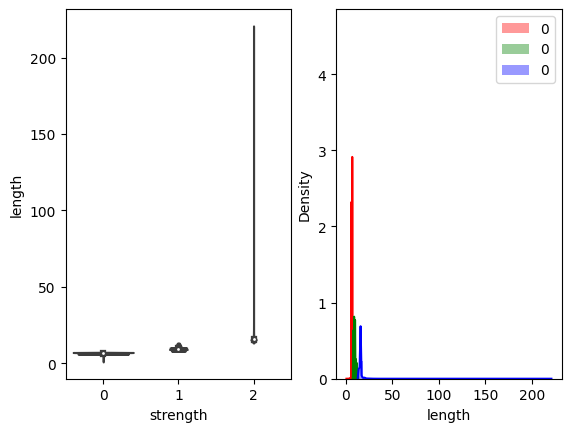

In [65]:
get_dist(data,"length")

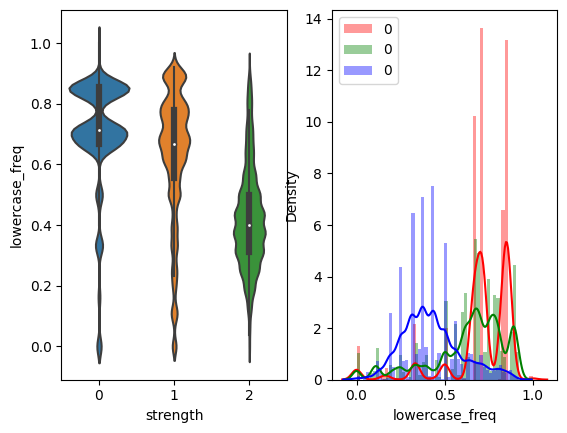

In [66]:
get_dist(data,"lowercase_freq")

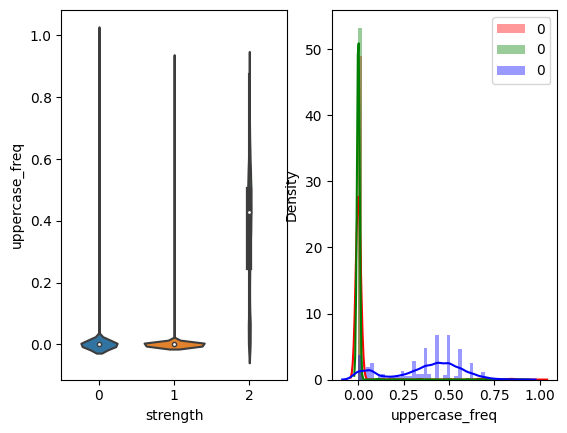

In [67]:
get_dist(data,"uppercase_freq")

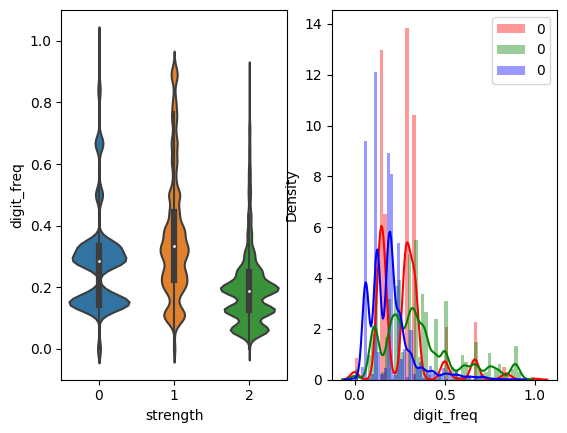

In [68]:
get_dist(data,"digit_freq")

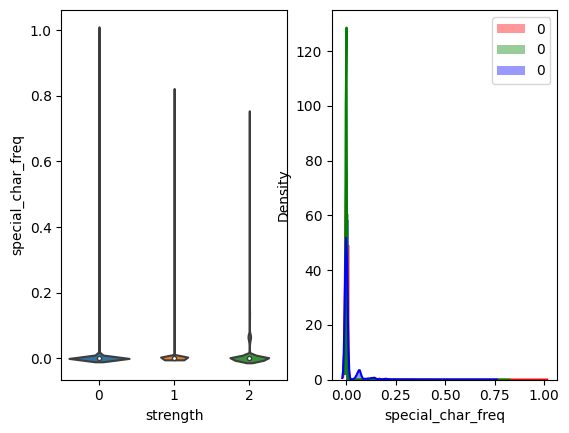

In [69]:
get_dist(data,"special_char_freq")

 ### TF-IDF to convert stringdata into vector representation

In [70]:
data

password  strength  length  lowercase_freq  \
0                    zxe870819         1       9           0.333   
1                 xw46454nr23l         1      12           0.417   
2                    soporte13         1       9           0.778   
3      accounts6000webhost.com         2      23           0.783   
4                     c443balg         1       8           0.625   
...                        ...       ...     ...             ...   
99995               obejofi215         1      10           0.700   
99996               fmiopvxb64         1      10           0.800   
99997                czvrbun38         1       9           0.778   
99998                mymyxe430         1       9           0.667   
99999              glqjhkxb467         1      11           0.727   

       uppercase_freq  digit_freq  special_char_freq  
0                 0.0       0.667              0.000  
1                 0.0       0.583              0.000  
2                 0.0       0.222              0.000  
3                 0.0       0.174              0.043  
4                 0.0       0.375              0.000  
...               ...         ...                ...  
99995             0.0       0.300              0.000  
99996             0.0       0.200              0.000  
99997             0.0       0.222              0.000  
99998             0.0       0.333              0.000  
99999             0.0       0.273              0.000  

[100000 rows x 7 columns]

### Shuffle data 

In [71]:
dataframe = data.sample(frac=1)

In [72]:
dataframe["password"]

72641     gkk5465881
22094       nikito85
49014       a3h5s7z9
25340      r00tx2013
72877         fr3301
            ...     
80292    sitemail811
53195      chelsea91
55970       operat0r
54442     simples190
52984       agisa599
Name: password, Length: 100000, dtype: object

In [73]:
x =list(dataframe["password"])

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [75]:
vectorizer = TfidfVectorizer(analyzer = "char")

In [76]:
X = vectorizer.fit_transform(x)

In [81]:
X.shape

(100000, 99)

In [82]:
dataframe["password"].shape

(100000,)

In [84]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [85]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [86]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.17264996, 0.        , 0.        , 0.24701626,
       0.50017377, 0.26203873, 0.        , 0.5054948 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.26393084, 0.        ,
       0.        , 0.        , 0.5149295 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [87]:
dataframe["password"]

72641     gkk5465881
22094       nikito85
49014       a3h5s7z9
25340      r00tx2013
72877         fr3301
            ...     
80292    sitemail811
53195      chelsea91
55970       operat0r
54442     simples190
52984       agisa599
Name: password, Length: 100000, dtype: object

In [88]:
vectorizer.get_feature_names_out()

#Features on which TF-IDF values are assigned

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [89]:
len(vectorizer.get_feature_names_out())

99

In [90]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

                                 !    #  ...    ñ    ó    õ  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
99995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

         ö    ÷    ú    ü    ý    þ    ›  
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  
99995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
99996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
99997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
99998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
99999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[100000 rows x 99 columns]

In [91]:
df2 =pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [92]:
df2.head(1)

                                 !    #  ...    ñ    ó    õ    ö  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

     ÷    ú    ü    ý    þ    ›  
0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 99 columns]

### Model Building

In [95]:
dataframe.columns

Index(['password', 'strength', 'length', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq'],
      dtype='object')

In [97]:
df2["length"] = dataframe["length"]
df2["lowercase_freq"] = dataframe["lowercase_freq"]

In [98]:
df2

                                 !    #  ...    õ    ö    ÷  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
99995  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99996  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99997  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99998  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99999  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

         ú    ü    ý    þ    ›  length  lowercase_freq  
0      0.0  0.0  0.0  0.0  0.0       9           0.333  
1      0.0  0.0  0.0  0.0  0.0      12           0.417  
2      0.0  0.0  0.0  0.0  0.0       9           0.778  
3      0.0  0.0  0.0  0.0  0.0      23           0.783  
4      0.0  0.0  0.0  0.0  0.0       8           0.625  
...    ...  ...  ...  ...  ...     ...             ...  
99995  0.0  0.0  0.0  0.0  0.0      10           0.700  
99996  0.0  0.0  0.0  0.0  0.0      10           0.800  
99997  0.0  0.0  0.0  0.0  0.0       9           0.778  
99998  0.0  0.0  0.0  0.0  0.0       9           0.667  
99999  0.0  0.0  0.0  0.0  0.0      11           0.727  

[100000 rows x 101 columns]

In [100]:
y = dataframe["strength"]

In [99]:
from sklearn.model_selection import train_test_split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(df2, y , test_size = 0.20)

In [102]:
X_train.shape

(80000, 101)

In [103]:
y_train.shape

(80000,)